In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I preprocess my data in my q2 that gives out a new version of news-train with cleaned Text
train_data = pd.read_csv('news-train-cleaned.csv')
test_data = pd.read_csv('news-test.csv')

In [2]:
# Shuffle data
train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# X/Y Split

# Training data
train_data_X = train_data['Text']
train_data_Y = train_data['Category']

# Test data
test_data_X = train_data['Text']

with open('dictionary.txt') as f:
	dic = f.read().splitlines()



### Q1A

n-estimators: 100 	  Avg. Training Accuracy: 1.0 	 Training Std. Deviation: 0.0
n-estimators: 100 	  Avg. Validation Accuracy: 0.9516778523489933 	  Std. Deviation: 0.008647046125318842


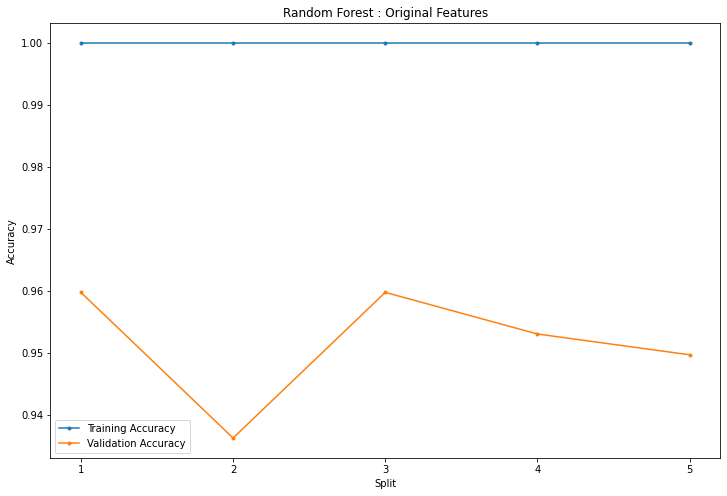

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

cv = CountVectorizer()
cv_train_X = cv.fit_transform(train_data_X)
feature_names = cv.get_feature_names_out()

train_Y = LabelEncoder().fit_transform(train_data_Y)

def get_rf_scores(features, train_Y):
    train_acc = []
    val_acc = []
    kf = KFold(n_splits=5, shuffle=True)
    for train, test in kf.split(features):

        x = features[train, :]
        y = train_Y[train]

        x_val = features[test, :]
        y_val = train_Y[test]

        rfc = RandomForestClassifier(n_estimators=100,
                                    criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

        rfc.fit(x, y)
        train_acc.append(rfc.score(x, y))
        val_acc.append(rfc.score(x_val, y_val))

    return train_acc, val_acc

def show_results(feature_name, train, val):
    print(
        f'n-estimators: 100 \t  Avg. Training Accuracy: {np.mean(train)} \t Training Std. Deviation: {np.std(train)}')
    print(
        f'n-estimators: 100 \t  Avg. Validation Accuracy: {np.mean(val)} \t  Std. Deviation: {np.std(val)}')

    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 6), train, marker='.', label='Training Accuracy')
    plt.plot(range(1, 6), val, marker='.', label='Validation Accuracy')
    plt.xlabel('Split')
    plt.xticks(range(1, 6))
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Random Forest : {feature_name}')
    plt.show()

cv_train_acc, cv_val_acc = get_rf_scores(cv_train_X, train_Y)

show_results('Original Features', cv_train_acc, cv_val_acc)

### Q1B - Glove

n-estimators: 100 	  Avg. Training Accuracy: 1.0 	 Training Std. Deviation: 0.0
n-estimators: 100 	  Avg. Validation Accuracy: 0.9375838926174496 	  Std. Deviation: 0.009153142078513988


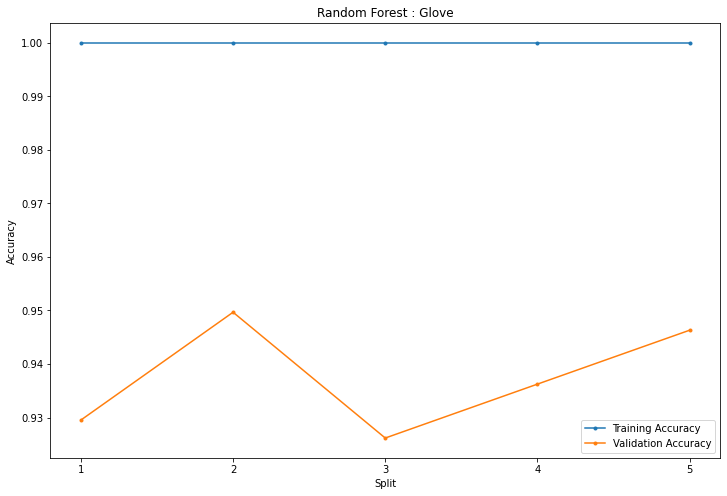

In [4]:
# https://github.com/nkthiebaut/zeugma
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove-wiki-gigaword-100')
glove_embedding = glove.transform(train_data_X)

glove_train, glove_valid = get_rf_scores(glove_embedding, train_Y)

show_results('Glove', glove_train, glove_valid)

### Q1B - TFIDF Vectors

n-estimators: 100 	  Avg. Training Accuracy: 1.0 	 Training Std. Deviation: 0.0
n-estimators: 100 	  Avg. Validation Accuracy: 0.9550335570469798 	  Std. Deviation: 0.00502235890842139


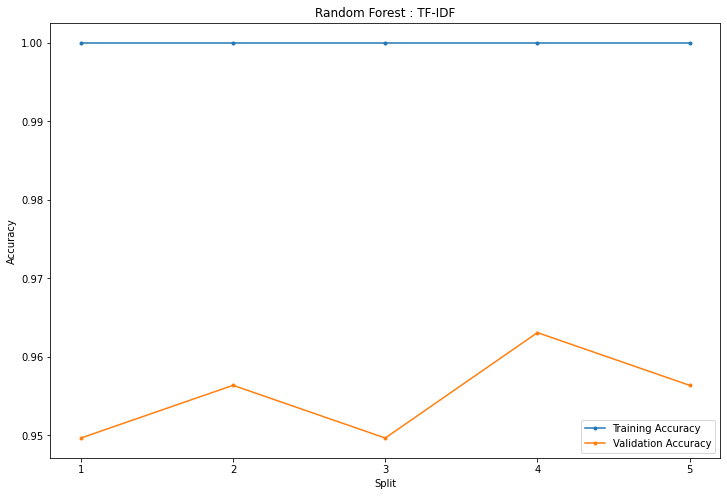

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(stop_words='english', lowercase=True,
                         analyzer='word', vocabulary=dic)

tf_idf_vec = tf_idf.fit_transform(train_data_X)

tf_idf_train, tf_idf_valid = get_rf_scores(tf_idf_vec, train_Y)

show_results('TF-IDF', tf_idf_train, tf_idf_valid)


In [6]:
import dataframe_image as dfi

q1_dic = {
    'Avg. Train Accuracy': [np.mean(glove_train)],
    'Avg. Valid Accuracy': [np.mean(glove_valid)],
    'Avg. Train Std. Deviation': [np.std(glove_train)],
    'Avg. Valid Std. Deviation': [np.std(glove_valid)]
}

q1_glove = pd.DataFrame(q1_dic, index=['Glove'])
q1_tfidf = pd.DataFrame({'Avg. Train Accuracy': [np.mean(tf_idf_train)],
              'Avg. Valid Accuracy': [np.mean(tf_idf_valid)],
              'Avg. Train Std. Deviation': [np.std(tf_idf_train)],
              'Avg. Valid Std. Deviation': [np.std(tf_idf_valid)]}, index = ['TFIDF'])
q1_res = pd.concat([q1_glove,q1_tfidf])
dfi.export(q1_res, 'q1_results.png')
